In [2]:
import numpy as np
import scipy as sp
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np

from scipy.integrate import solve_ivp

def sir_function(t, y, beta, gamma):
    dS = -beta*y[0]*y[1]
    dI = beta*y[0]*y[1] -gamma*y[1]
    dR = gamma*y[1]
    return(dS,dI,dR)


def run_sir_model(beta,gamma,initial_state, max_time, freq_dependent):

    if freq_dependent == True:
        beta_divisor = initial_state[0] + initial_state[1] +initial_state[2]
    else:
        beta_divisor = 1
    beta_model = beta/beta_divisor
    t_eval = np.arange(0, max_time+0.2, 0.2)
    sir_output = solve_ivp(sir_function,(0, max_time),initial_state,method="LSODA",t_eval = t_eval, args = (beta_model,gamma))

    return(sir_output)


In [4]:
mle1 = np.genfromtxt("C:\\Users\\ollie\\PycharmProjects\\PLS Research\\Data\\R0_3\\Fitted\\MLE_b_3.csv", delimiter=",")[0]
mle2 = np.genfromtxt("C:\\Users\\ollie\\PycharmProjects\\PLS Research\\Data\\R0_3\\Fitted\\MLE_b_I0_1_3.csv", delimiter=",")[0]

<Axes: >

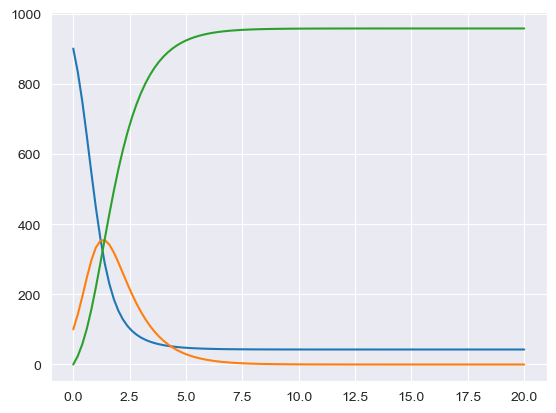

In [5]:
# Code here
beta = mle1
gamma = 1
y = [900,100,0]
times = np.arange(0, 20+0.2, 0.2)
res = run_sir_model(beta,gamma,y,20, True).y
from matplotlib import pyplot as plt
fig, axs =  plt.subplots()
sns.lineplot(x=times,y=res[0],ax=axs)
sns.lineplot(x=times,y=res[1],ax=axs)
sns.lineplot(x=times,y=res[2],ax=axs)

Max Time for Run 1000 is 3.6
Max Time for Run 100 is 2.6
Max Time for Run 10 is 1.4000000000000001


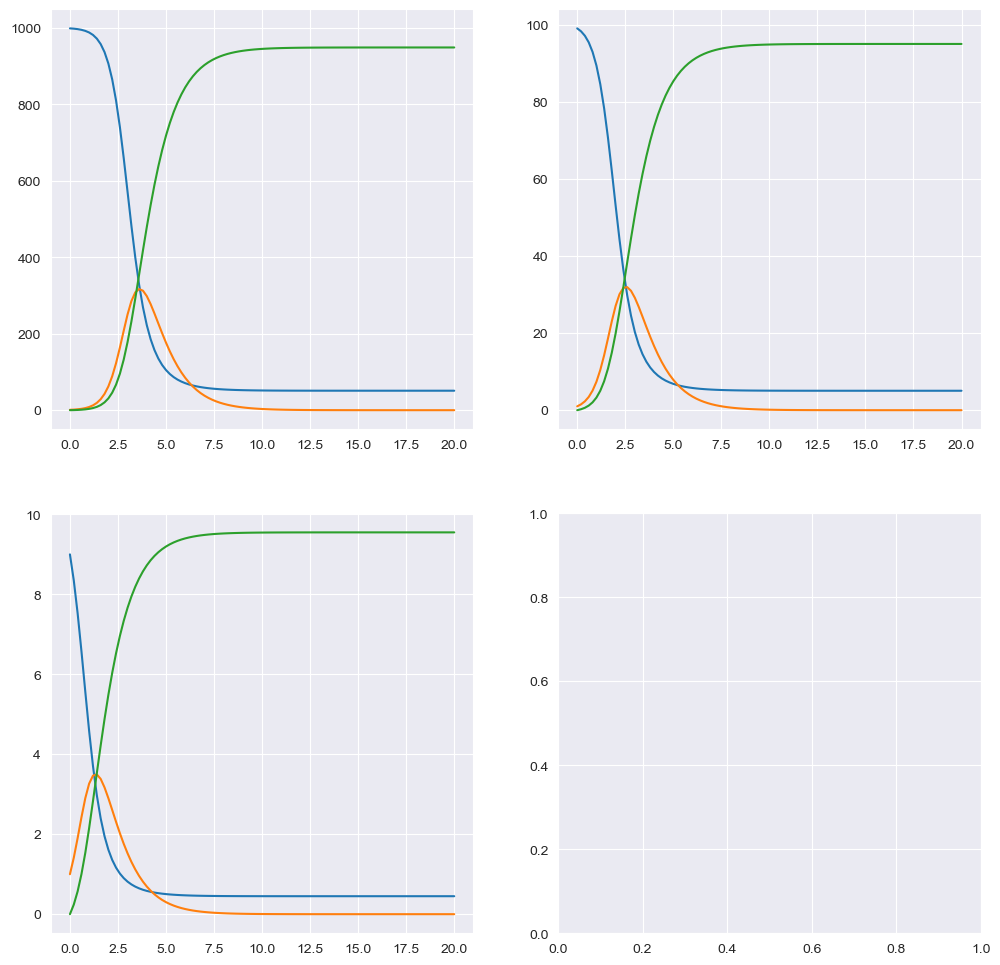

In [6]:
# Code here
from matplotlib import pyplot as plt
beta = mle2
gamma = 1
fig, ax0 =plt.subplots(figsize = (12,12),nrows=2,ncols=2)
ax0 = ax0.flatten()
times = np.arange(0, 20+0.2, 0.2)
y0s = [[999,1,0],[99,1,0],[9,1,0]]
for i in range(0,3):
    y = y0s[i]
    res = run_sir_model(beta,gamma,y,20, True).y
    sns.lineplot(x=times,y=res[0],ax=ax0[i])
    sns.lineplot(x=times,y=res[1],ax=ax0[i])
    sns.lineplot(x=times,y=res[2],ax=ax0[i])
    print(f"Max Time for Run {sum(y0s[i])} is {times[np.argmax(res[1])]}")

Max Time for Run 3.1352856843582155 is 1.4000000000000001
Max Time for Run 2 is 1.8


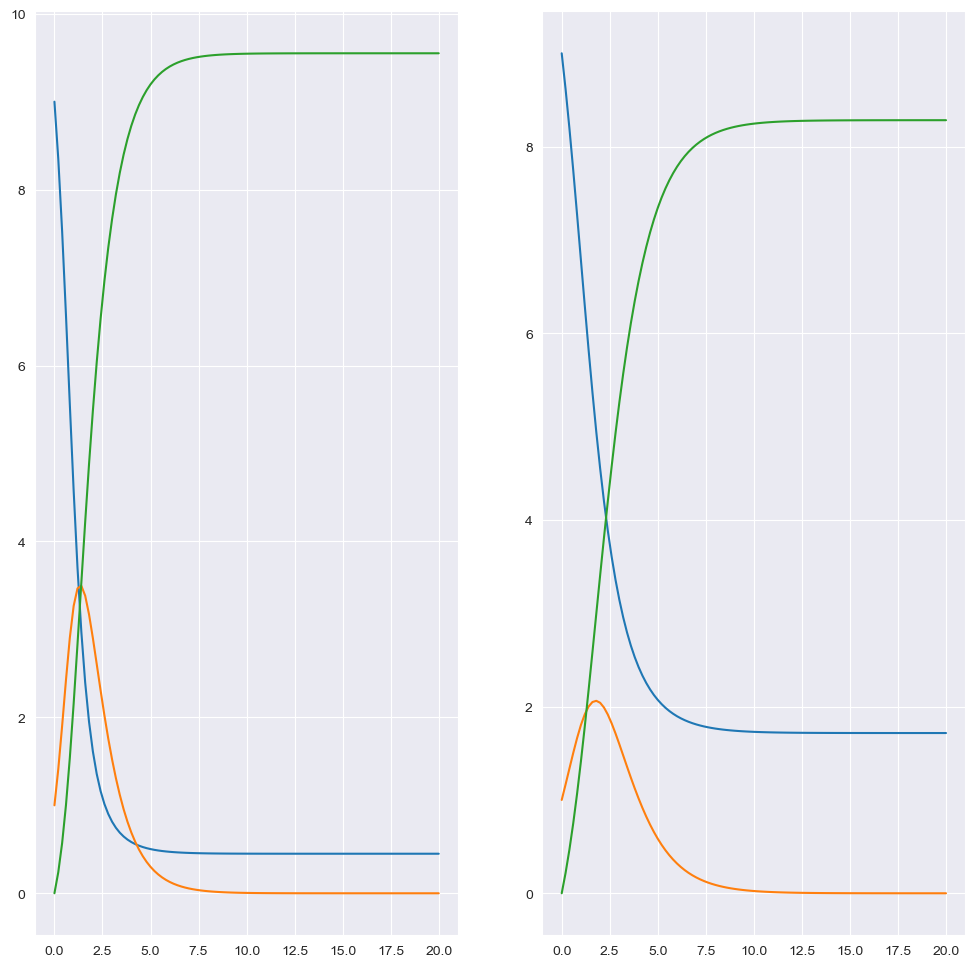

In [7]:
# Code here
from matplotlib import pyplot as plt
betas = [mle2,2]
gamma = 1
fig, ax0 =plt.subplots(figsize = (12,12),ncols=2)
ax0 = ax0.flatten()
times = np.arange(0, 20+0.2, 0.2)
y0s = [9,1,0]
for i in range(0,2):
    y = y0s
    res = run_sir_model(betas[i],gamma,y,20, True).y
    sns.lineplot(x=times,y=res[0],ax=ax0[i])
    sns.lineplot(x=times,y=res[1],ax=ax0[i])
    sns.lineplot(x=times,y=res[2],ax=ax0[i])
    print(f"Max Time for Run {betas[i]} is {times[np.argmax(res[1])]}")

In [8]:
def meta_function(t, y, beta, gamma,kernel,distance):
    out = []
    for i in range(0,4):
        other_nodes = np.delete(np.arange(0,4,1),i)
        external_infections = sum([kernel(beta,distance[i][j])*y[0+j*3]*y[1+j*3] for j in other_nodes])
        dS = -beta*y[0+i*3]*y[1+i*3] - external_infections
        dI = external_infections + beta*y[0+i*3]*y[1+i*3] -gamma*y[1+i*3]
        dR = gamma*y[1+i*3]
        out.append(dS)
        out.append(dI)
        out.append(dR)
    return(out)

In [9]:
def run_meta_model(beta,gamma,initial_state, max_time, freq_dependent,kernel,distance):

    if freq_dependent == True:
        beta_divisor = initial_state[0] + initial_state[1] +initial_state[2]
    else:
        beta_divisor = 1
    beta_model = beta/beta_divisor
    t_eval = np.arange(0, max_time+0.2, 0.2)
    sir_output = solve_ivp(meta_function,(0, max_time),initial_state,method="LSODA",t_eval = t_eval, args = (beta_model,gamma,kernel,distance),vectorized=True)

    return(sir_output)

In [10]:
from src.PLS.utils import basic_kernel
from src.PLS.utils import basic_square_map
from src.PLS.utils import straight_line_distances
N = 4
times = np.arange(0, 20+0.2, 0.2)
test_map = basic_square_map(N)
test_distances = straight_line_distances(test_map,N,scaling=10)
y0 = [999,1,0,1000,0,0,1000,0,0,1000,0,0]
meta_out = run_meta_model(5/1000,1,y0,20,False,basic_kernel,test_distances).y

In [14]:
print([i>=1 for i in meta_out[4]])

[False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


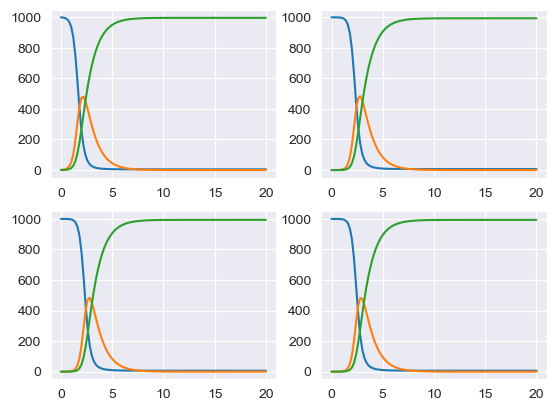

In [11]:
fig,ax0 = plt.subplots(nrows=2,ncols=2)
ax0 = ax0.flatten()
for i in range(0,4):
    sns.lineplot(x=times,y=meta_out[0+i*3],ax=ax0[i])
    sns.lineplot(x=times,y=meta_out[1+i*3],ax=ax0[i])
    sns.lineplot(x=times,y=meta_out[2+i*3],ax=ax0[i])